<a href="https://colab.research.google.com/github/BladimirBL/Talento-Tech/blob/main/New_Notebook_Data_Cleaning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. El problema del negocio

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

#2. El set de datos

La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (`dataset_banco.csv`) con 45215 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

#3. Una primera mirada al dataset


In [ ]:
# Importar Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Lectura
from google.colab import drive
drive.mount('/content/drive')

ruta = ('/content/drive/MyDrive/dataset_banco-1.csv')
data = pd.read_csv(ruta)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(data.shape)
data.head(17)

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
5,35,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139.0,1,-1.0,0,unknown,no
6,28,Management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217.0,1,-1.0,0,unknown,no
7,42,entrepreneur,div.,tertiary,yes,2.0,yes,no,unknown,5,may,380.0,1,-1.0,0,unknown,no
8,58,retired,married,primary,no,121.0,yes,no,unknown,5,may,50.0,1,-1.0,0,unknown,no
9,43,technician,single,secondary,no,593.0,yes,No,unknown,5,may,55.0,1,-1.0,0,unknown,no


In [ ]:
# Veamos las variaables categoricas numericas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


#4. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

## 4.1 Datos faltantes

Acá comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

El número total de registros debería ser 45.215. Sin embargo columnas como "job", "marital", "education", "balance", "duration" y "pdays".

Por ser tan pocos los datos  faltantes optaremos por eliminar las filas correspondientes:



In [ ]:
# Esto es para eliminar filsa correspondientes
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


##4.2 Columnas irrelevantes

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
- **Una columna categórica pero con un sólo nivel**. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
- **Una columna numérica pero con un sólo valor**. Por ejemplo si en la columna "edad" todos los valores fuesen iguales a 50.
- **Columnas con información redundante**. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:


-Notas acerca de ciclo FOR


*for col in cols_cat:: Este es un bucle for que itera sobre cada elemento en la lista cols_cat. La variable col tomará el valor de cada elemento en cada iteración del bucle.

*print(f'Columna {col}: {data[col].nunique()} subniveles'): Dentro del bucle, esta línea de código imprime un mensaje que indica el nombre de la columna (col), seguido por el número de subniveles únicos en esa columna.

*f'Columna {col}: {data[col].nunique()} subniveles': Esta es una cadena de formato (f-string) que contiene dos variables:
{col}: Representa el nombre de la columna actual en la iteración del bucle.
{data[col].nunique()}: Representa el número de subniveles únicos en la columna actual. data[col] selecciona la columna actual del DataFrame y .nunique() calcula el número de valores únicos en esa columna.


In [ ]:
# Conteo de los niveles en las diferentes columnas categoricas
cols_cat = ['job','marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

for col in cols_cat:
  print(f'columna {col}: {data[col].nunique()} subniveles')

columna job: 18 subniveles
columna marital: 6 subniveles
columna education: 10 subniveles
columna default: 2 subniveles
columna housing: 2 subniveles
columna loan: 6 subniveles
columna contact: 5 subniveles
columna month: 12 subniveles
columna poutcome: 6 subniveles
columna y: 2 subniveles


Todas las columnas categóricas tienen mas de 1 subnivel.No eliminaremos ninguna , verifiquemos lo que ocurre con las columnas númericas

In [ ]:
# En agradecimientos a Lala♥
colscat = ['job', 'marital', 'education', 'default', 'housing',
           'loan', 'contact', 'month', 'poutcome', 'y']
for col in colscat:
  print('Columna', col, {data[col].nunique()}, 'subniveles')
# This is another way of doing what we did above in the code, we were just finding out another resolution, thanks in advance for your understanding.

Columna job {18} subniveles
Columna marital {6} subniveles
Columna education {10} subniveles
Columna default {2} subniveles
Columna housing {2} subniveles
Columna loan {6} subniveles
Columna contact {5} subniveles
Columna month {12} subniveles
Columna poutcome {6} subniveles
Columna y {2} subniveles


In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
# Contelos de valores con  -1
Count = data['pdays'].value_counts()[-1]

print(Count)

36953


In [ ]:
# Calcule la media del atributo "pdays: dias de contacto al usuario antes de la campana actual"   Media = promedio   la media do el promedio de pdays
media = data['pdays']. mean()
print ('Promedio de dias de contacto:', media)

Promedio de dias de contacto: 40.17822461123277


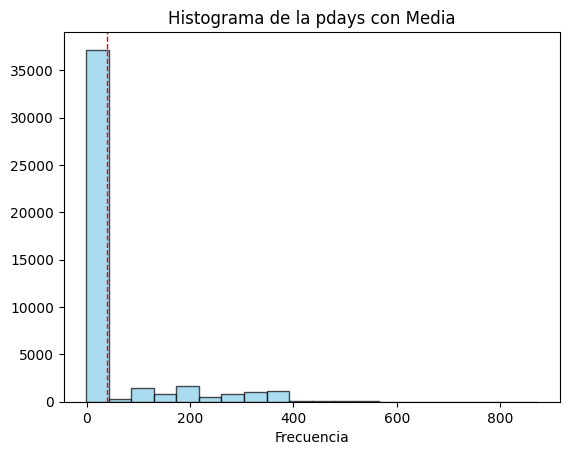

In [ ]:
# Graficar un histograma del atributo "pdays"
plt.hist(data['pdays'], bins=20, color ='skyblue', edgecolor='black', alpha=0.7)

# Agregar una linea vertical para mostrar la media
plt.axvline(media, color='red', linestyle='dashed', linewidth=1)

# Etiquetas y titulo
plt.xlabel('Valor de la pdays')
plt.xlabel('Frecuencia')
plt.title('Histograma de la pdays con Media')

# Mostrar la grafica
plt.show()


In [ ]:
# Calcule la desviacion estandar del atrivuto campaña
desviacion_estandar = data['pdays'].std()

print('Desviacion estandar de la pdays:', desviacion_estandar)

Desviacion estandar de la pdays: 100.10328306134589


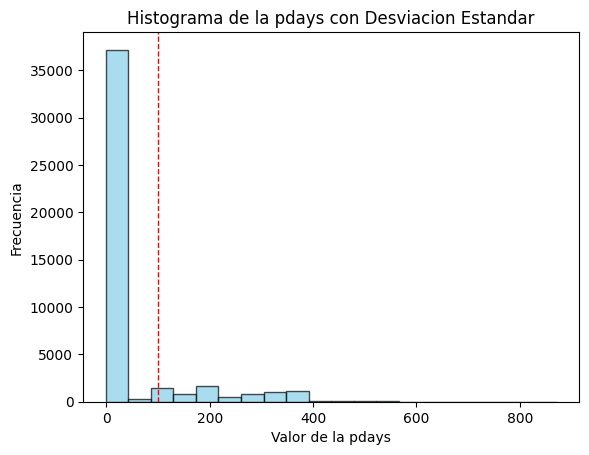

In [ ]:
# Graficar un histograma del atributo "campana"
plt.hist(data['pdays'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Agregar una linea vertical para mostrar la desviacion estandar
plt.axvline(desviacion_estandar, color='red', linestyle='dashed', linewidth=1)

# Etiqueta y titulo
plt.xlabel('Valor de la pdays')
plt.ylabel('Frecuencia')
plt.title('Histograma de la pdays con Desviacion Estandar')

# Mostraar la grafica.
plt.show()

# **4.3 Filas Repidas**


In [ ]:
# Mostramos la cantidad de registros antes de aplicar una transformacion, limpieza o filtro
print(f'Tamano del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
# Mostramos la cantidad de registros despues de aplicar una transformacion, limpieza o filtro
print(f'Tamano del set despues de eliminar las filas repetidas: {data.shape}')

Tamano del set antes de eliminar las filas repetidas: (45207, 17)
Tamano del set despues de eliminar las filas repetidas: (45203, 17)


# **4.4 Outliers en las variables númericas**

No siempre se deben eliminar los outliers porque dependiendo de la variable númerica anazlidad estos pueden contener información importante

Creemos gráficas tipo "boxplot" de las columnas númericas

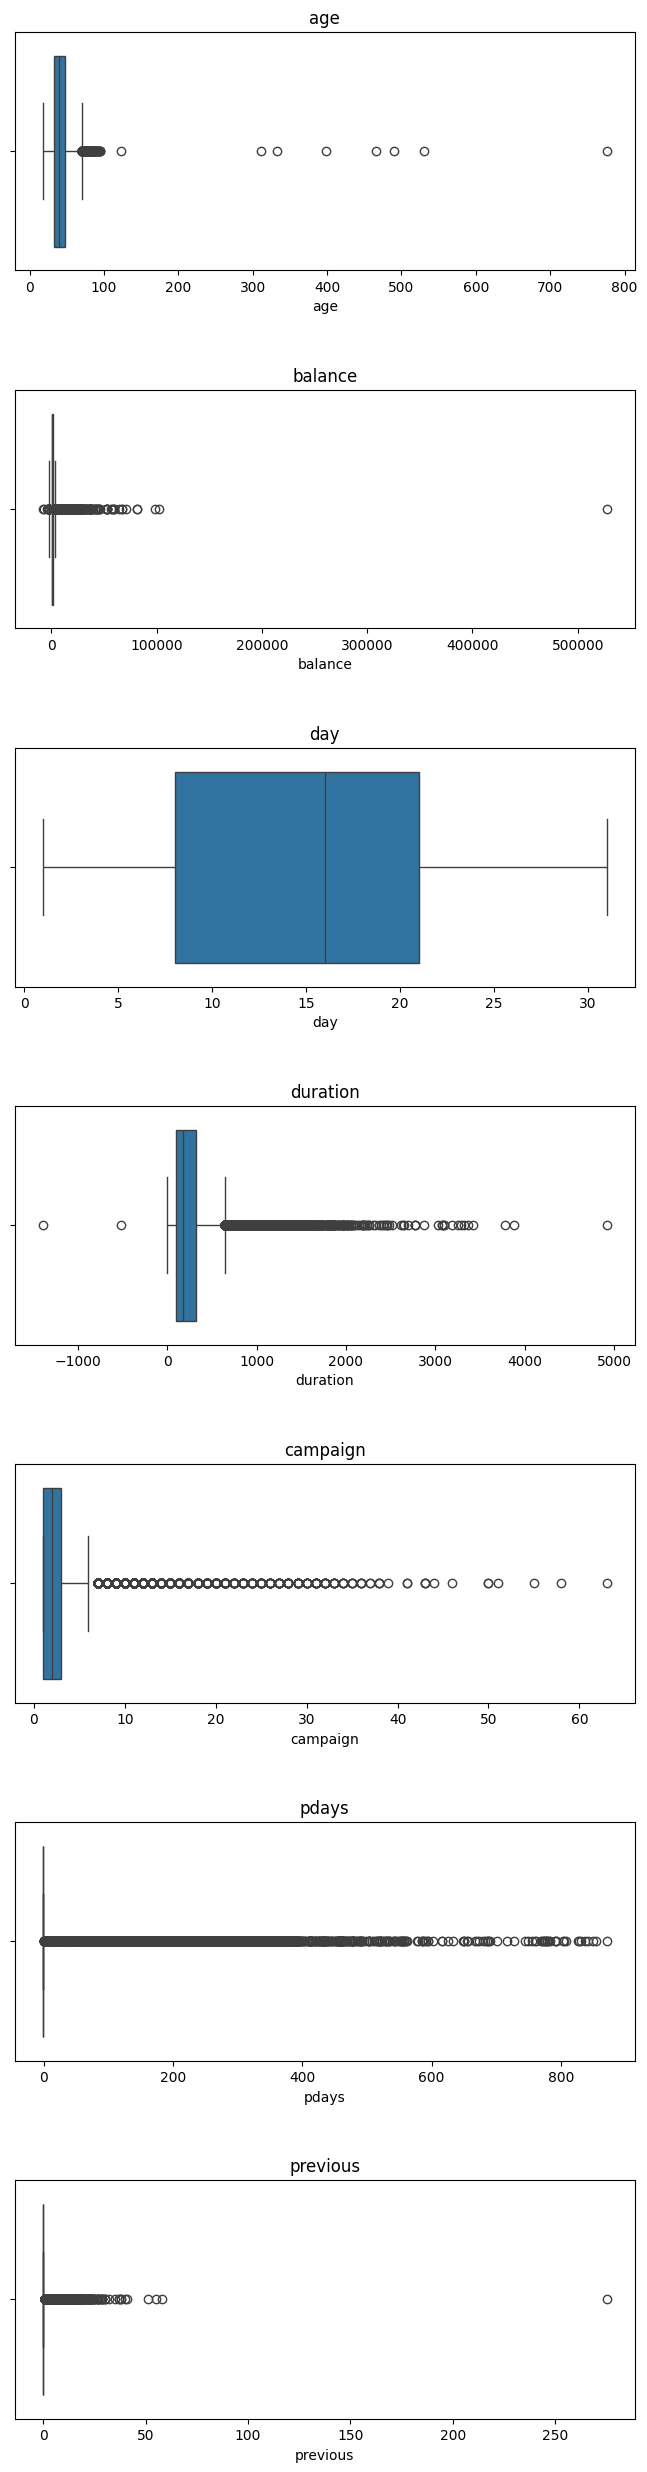

In [ ]:
# Generar graficas individualespues las variables numericas estan en rangos diferentes

cols_num = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,31))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
  sns.boxplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)



# **Observaciones**


*   "age": hay sujetos con edades mucho mayores a 100 años
*   "duration": hay valores negativos
*   "previous": hay un valor extremadamente alto (cernano a 300)



In [ ]:
# Eliminar filas con  con 'age'>100******
print(f'tamano del sen antes de eliminar registros de edad: {data.shape}')
data = data.drop(data[data['age'] > 100].index)
print(f'tamano del set despues de eliminar registros de edad: {data.shape}')

tamano del sen antes de eliminar registros de edad: (45203, 17)
tamano del set despues de eliminar registros de edad: (45195, 17)


In [ ]:
# Eliminar filas con "durtion"<0--------------------------------------------------------------------------
print(f'Tamano del sent antes de eliminar registros de duracion:{data.shape}')
data = data.drop(data[data['duration'] < 0].index)
print(f'Tamano del sent despues de eliminar registros de duracion:{data.shape}')
#data = data[data['duration']>0]

Tamano del sent antes de eliminar registros de duracion:(45195, 17)
Tamano del sent despues de eliminar registros de duracion:(45193, 17)


In [ ]:
# Eliminar filas con "[previous]">100
print(f'Tamano del sent antes de eliminar registros de previous:{data.shape}')
data = data.drop(data[data['previous'] > 100].index)
print(f'Tamano del sent despues de eliminar registros de previous:{data.shape}')
#data = data[data['[previous]']<=0]

Tamano del sent antes de eliminar registros de previous:(45193, 17)
Tamano del sent despues de eliminar registros de previous:(45192, 17)


## **4.5 Errores tipograficos en variables categoricas**
En una variable categorica pueden aparecer subniveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro porgrama parecerian diferentes
Se deben unificar estos sub-niveles

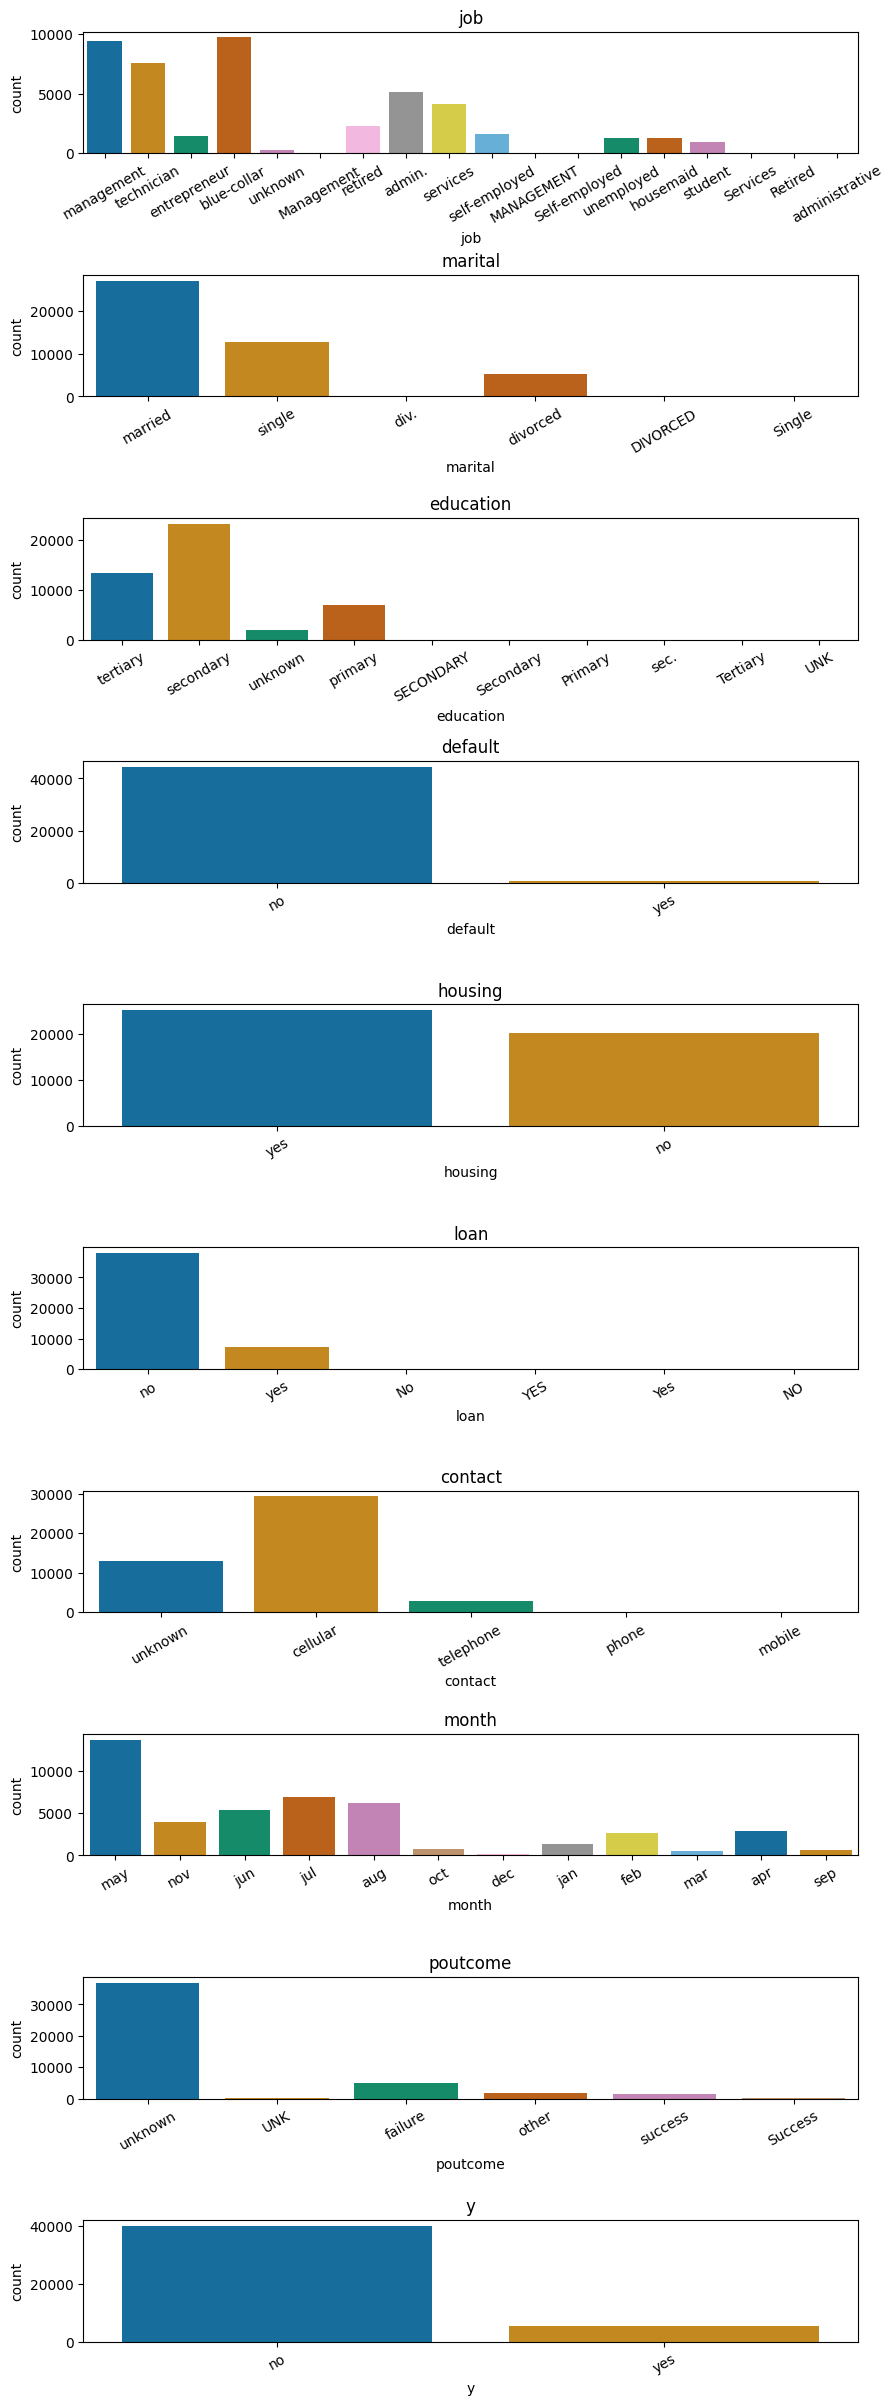

In [ ]:
# Graficas los los subniveles de cada variable categorica
cols_cat =('job','marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y')

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, hue=col, data=data, ax=ax[i], palette='colorblind', legend=False)
  ax[i].set_title(col)
  ax[i].tick_params(axis='x', labelrotation=30)




Inicialmente se observa que hay sub-niveles con el mismo nombre pero escritos , en mayusculas o con la primera letra en mayuscula.
Unifiquemos estos sub-niveles inicialmente

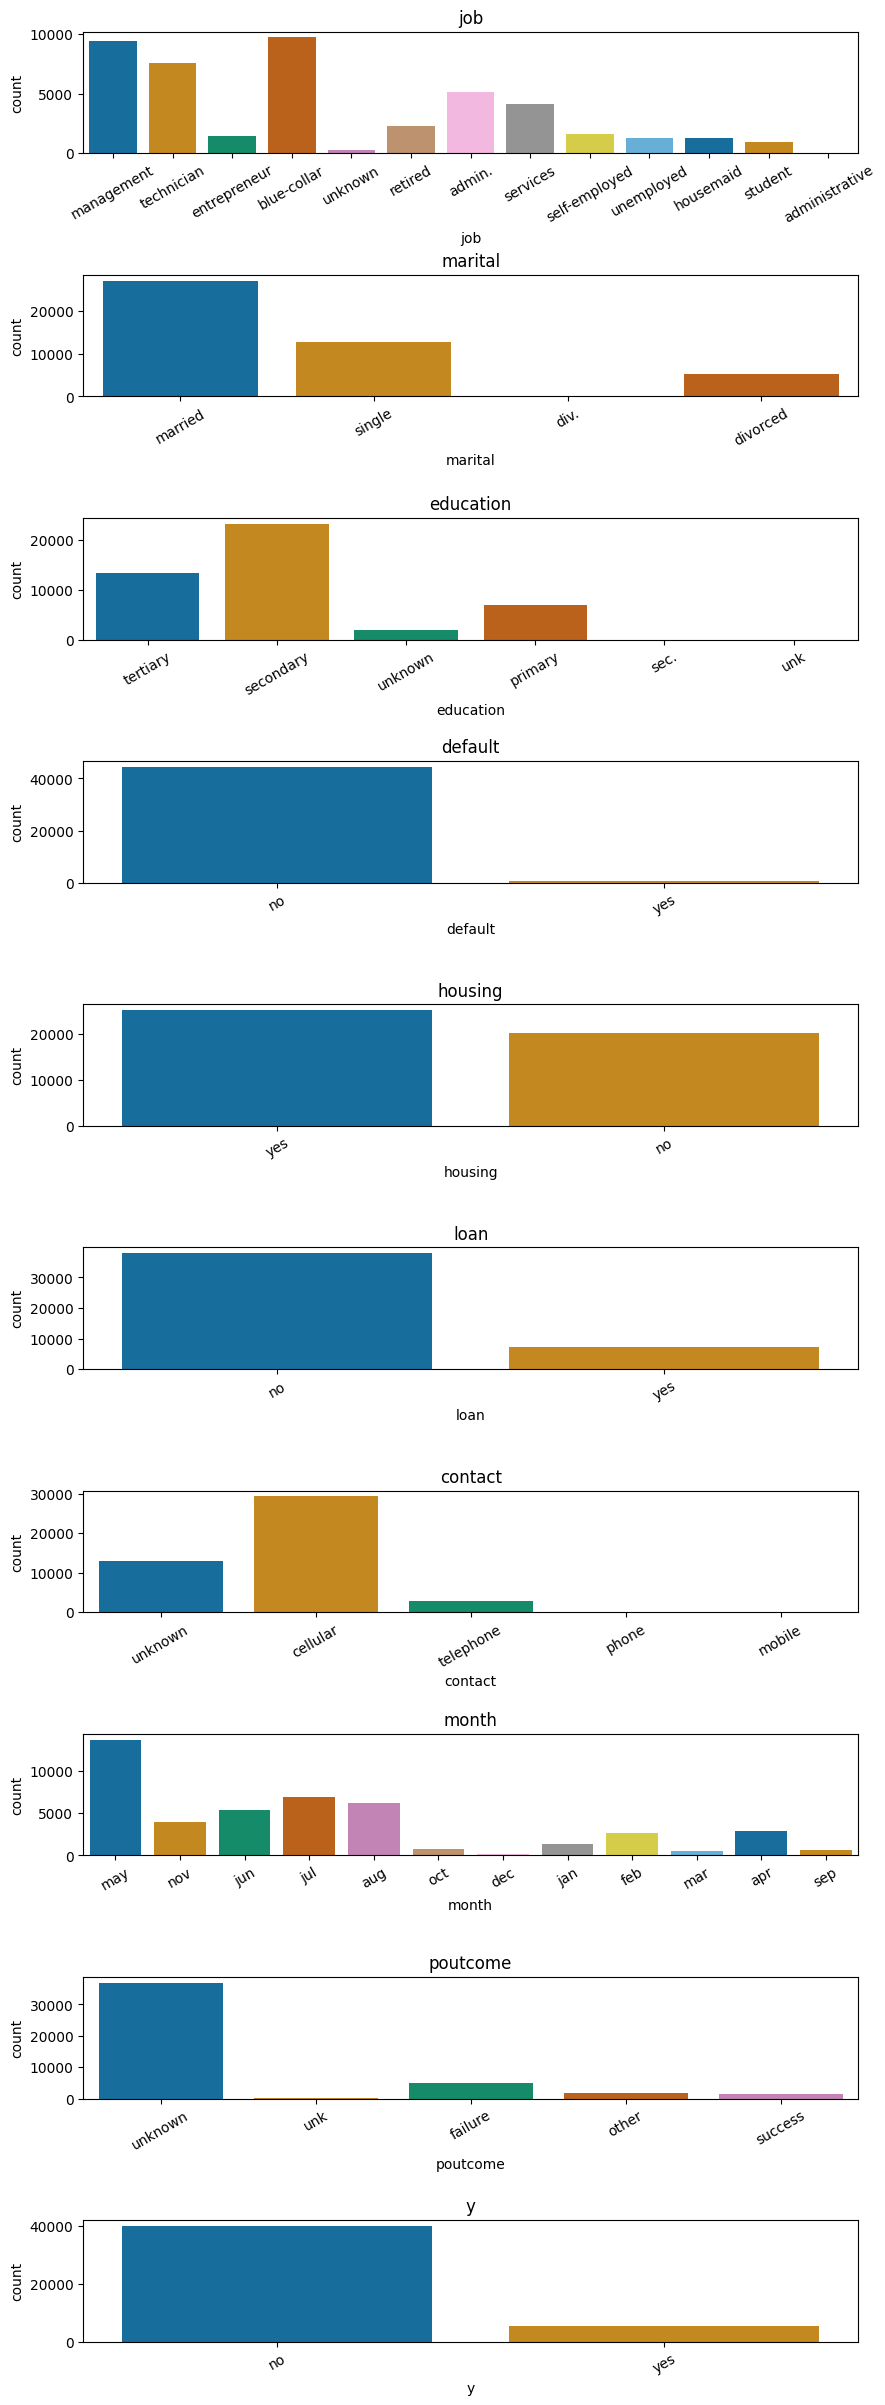

In [ ]:
for column in data.columns:
  # Representar en minusculas solo si la columna es categorica
  if column in cols_cat:
    data[column] = data[column].str.lower()

# Y genermos las graficas nuevamente
fig, ax= plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, hue=col, data=data, ax=ax[i], palette='colorblind', legend=False)
  ax[i].set_title(col)
  ax[i].tick_params(axis='x', labelrotation=30)


#for i, col in enumerate(cols_cat):
#  sns.countplot(x=col, data=data, ax=ax[i])
 # ax[i].set_title(col)
  #ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)


In [ ]:
# job: Unificar admin. y administrative
print(data['job'].unique())
data['job'] = data['job'].str.replace('admin','administrative', regex=False)
print(data['job'].unique)


['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' 'administrative']
<bound method Series.unique of 0          management
1          technician
2        entrepreneur
3         blue-collar
4             unknown
             ...     
45210      technician
45211         retired
45212         retired
45213     blue-collar
45214    entrepreneur
Name: job, Length: 45192, dtype: object>


In [ ]:
# marital: unificar div. y divorced
print(data['marital'].unique())
data['marital'] = data['marital'].str.replace('div','divorced', regex=False)
print(data['marital'].unique)

['married' 'single' 'div.' 'divorced']
<bound method Series.unique of 0              married
1               single
2              married
3              married
4               single
             ...      
45210          married
45211    divorcedorced
45212          married
45213          married
45214          married
Name: marital, Length: 45192, dtype: object>


In [ ]:
# education: unificar sec. y secondary, unk y unknown
print(data['education'].unique())
data['education'] = data['education'].str.replace('sec','secondary', regex=False)
data.loc[data['education']=='unk','education'] = 'unknown'
print(data['education'].unique)

['tertiary' 'secondary' 'unknown' 'primary' 'sec.' 'unk']
<bound method Series.unique of 0               tertiary
1        secondaryondary
2        secondaryondary
3                unknown
4                unknown
              ...       
45210           tertiary
45211            primary
45212    secondaryondary
45213    secondaryondary
45214    secondaryondary
Name: education, Length: 45192, dtype: object>


In [ ]:
# contact: unificar telephone. y phone

print(data['contact'].unique())
data.loc[data['contact']=='phone','contact'] = 'telephone'
data.loc[data['contact']=='mobile','contact'] = 'cellular'
print(data['contact'].unique())

['unknown' 'cellular' 'telephone' 'phone' 'mobile']
['unknown' 'cellular' 'telephone']


In [ ]:
#  # poutcome: unificar unk y unknown

print(data['poutcome'].unique())
data.loc[data['poutcome']=='unk','poutcome'] = 'unknown'
print(data['poutcome'].unique())

['unknown' 'unk' 'failure' 'other' 'success']
['unknown' 'failure' 'other' 'success']


In [ ]:
data.shape

(45192, 17)

Listo ya hemos realizado la limpieza de nuestro set de datos
Originalmente tenia 452.15 registros y 17 columnas.El dataset resultante tiene 45.192 filas 23 filas y 17 columnas.
El set de datos ya esta listo para el analisis exploratorio

In [ ]:
ruta ='/content/drive/MyDrive/data.CSV'
data.to_csv(ruta, index=False)

Responde a las siguientes preguntas de negocio

1)¿Cuál es la edad promedio de los clientes interesados en adquirir un certificado de depósito?

2)En una gráfica, establece la diferencia de ingresos entre clientes interesados y no interesados en el certificado de depósito

3)En un gráfico de barras, establece la distribución de género entre clientes interesados en el certificado de depósito
4)¿Cuál es el nivel educativo predominante e
ntre clientes interesados en el certificado de depósito?
5)¿Cuál es la relación entre estado civil vs el interés en adquirir el certificado de depósito?

6)¿Cuál es la distribución del medio de contacto más frecuente de los clientes interesados en adquirir el certificado de depósito?

7)En un gráfico de barras horizontales responde, ¿Cuál es el tipo de ocupación de los clientes interesados en adquirir el certificado de depósito?

8)¿Cuál es la frecuencia de contacto con los clientes interesados antes de la conversión?

9)¿Cuál es el patrón temporal en los contactos que conducen a una mayor conversión de clientes?



In [ ]:
path = '/content/drive/MyDrive/Copia de banco-2.csv'

In [ ]:
print(data.shape)
data.head(10)

(45192, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondaryondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondaryondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
5,35,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139.0,1,-1.0,0,unknown,no
6,28,management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217.0,1,-1.0,0,unknown,no
7,42,entrepreneur,divorced.,tertiary,yes,2.0,yes,no,unknown,5,may,380.0,1,-1.0,0,unknown,no
8,58,retired,married,primary,no,121.0,yes,no,unknown,5,may,50.0,1,-1.0,0,unknown,no
9,43,technician,single,secondaryondary,no,593.0,yes,no,unknown,5,may,55.0,1,-1.0,0,unknown,no


In [ ]:
edad_promedio_interesados = data[data['y']=='yes'] ['age'].mean()
print('1. Edad promedio de los clientes interesaados:', edad_promedio_interesados)

1. Edad promedio de los clientes interesaados: 41.665468306527906


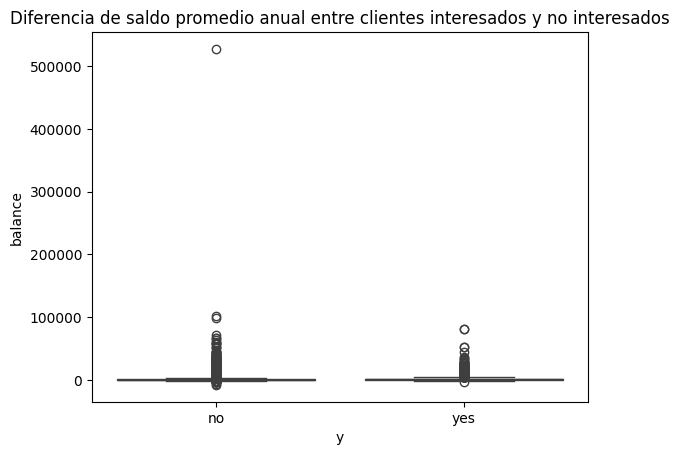

In [35]:
# diferencia de ingresos entre clientes interesados y no interesados en el certificado de depósito
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='y', y='balance', data=data)
plt.title('Diferencia de saldo promedio anual entre clientes interesados y no interesados')
plt.show()